# Анализ продаж компьютерных игр для интернет-магазина "Стримчик".
**Декабрь 2016 года.**  
Цель: при планировании рекламных компаний в 2017 году сделать ставку на продукты, которые станут популярными.
Для этого необходимо изучить исторические данные о продажах игр из открытых источников с целью выявления закономерностей, определяющих успешность игры. 

## Оглавление
- [Загрузка и подготовка данных](#upload) 
- [Исследовательский анализ данных](#analysis)
- [Портреты пользователей по регионам](#users)
- [Проверка гипотез](#stat)
- [Выводы](#conclusion)

<a id='upload'></a>
## Загрузка и подготовка данных

In [1]:
# Импорт библиотек.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import matplotlib.gridspec as gridspec

In [2]:
# Загрузка файла с исходными данными
try:
    df = pd.read_csv('c:/projects/datasets/games.csv')
    display(df.head(5))
except:
    print('Попробуйте другие параметры')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Гистограммы по всем столбцам датасета


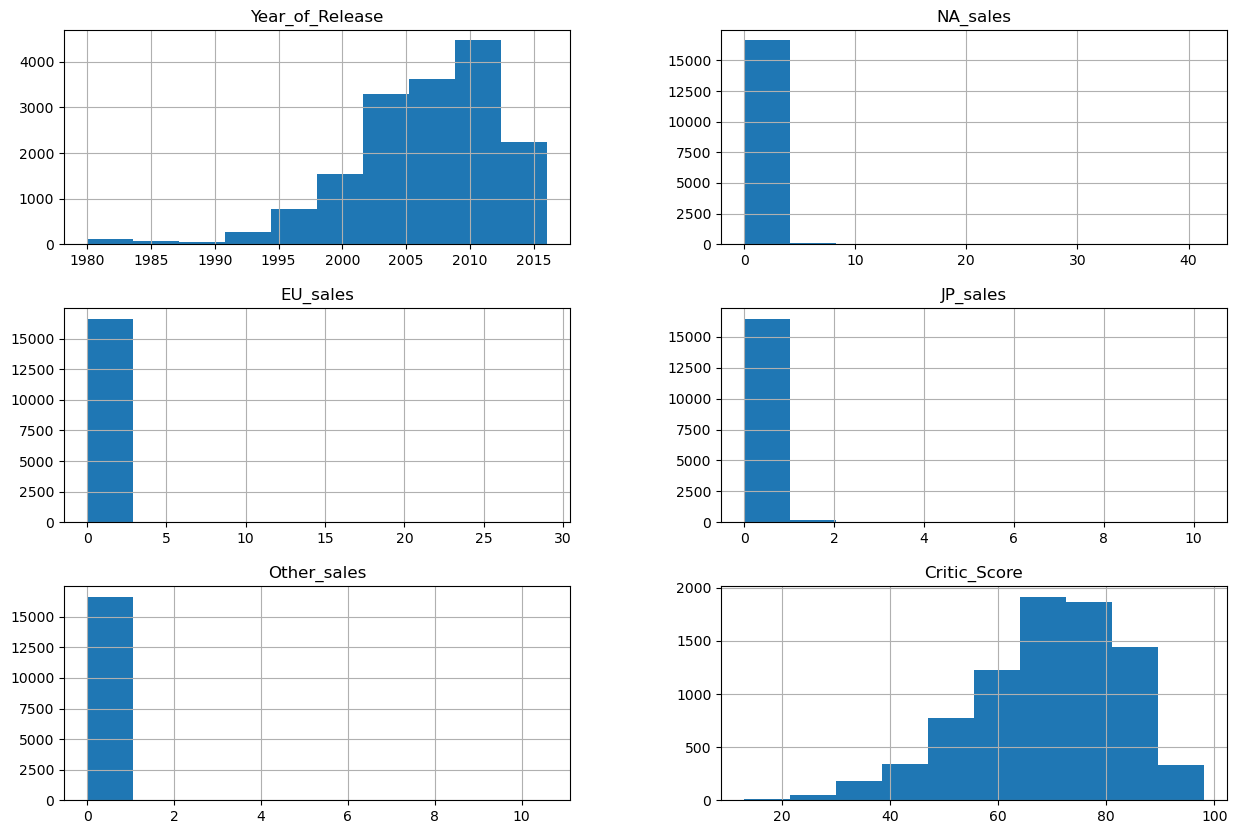

In [4]:
print('Гистограммы по всем столбцам датасета')
df.hist(figsize=(15,10));

На первый взгляд в данных есть следующие вызовы:
- Не правильный тип данных в столбцах `Year_of_Release`, `Critic_Score`, `User_Score`, необходима замена для оптимизации использования вычисилтельных ресурсов.
- пропуски в данных в столбцах `Name`, `Genre`, `Critic_Score`, `User_Score`
- Названия столбцов содержат заглавные буквы

In [5]:
# Переименование столбцов.
df = df.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Выводим строки с пропусками в столбце 'name'
df.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# в этих строках также пропуски в 'genre' (2 единственных в этом столбце), а также в столбцах с оценками и рейтингом.
# удаляем
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
# Строки с пропусками в столбце 'year_of_release'
df.query('year_of_release.isna() == True').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


В некоторых названиях содержится год выпуска игры.
Если это так, то год выпуска продукта - на год раньше.  
Примеры:
* [Madden NFL 2004](https://ru.wikipedia.org/wiki/Madden_NFL_2004)
* [wwe Smackdown vs. Raw 2006](https://en.wikipedia.org/wiki/WWE_SmackDown!_vs._Raw_2006)
* [Triple Play 99](https://en.wikipedia.org/wiki/Triple_Play_99)

In [9]:
# создание списка лет (4 цифры)
years_array = [1980]
for i in range(1981,2018):
    years_array.append(i)

# присвоение пропуску в столбце 'year_of_release' номера года минус один, если он содержится в названии (из 4х цифри)
for year in years_array:
    x = str(year)
    df.loc[((df['year_of_release'].isna())&(df['name'].str.contains(x))), 'year_of_release'] = year
df.query('year_of_release.isna() == True').head(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
# создание списка лет (2 цифры)
years_array = [80]
for i in range(81,100):
    years_array.append(i)

# присвоение пропуску в столбце 'year_of_release' номера года минус один, если он содержится в названии (из 2х цифри)
for year in years_array:
    x = str(year)
    df.loc[((df['year_of_release'].isna())&(df['name'].str.contains(x))), 'year_of_release'] = (1900+year)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16463 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Оставшиеся пропуски заполнить не представляется возможным.

In [11]:
# Уникальные значения столбца 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` присутствуют значения `NaN` и `tbd`.  `tbd` = to be determined, т.е сейчас рейтинг не определен. Предположим, что это значение для новых игр.

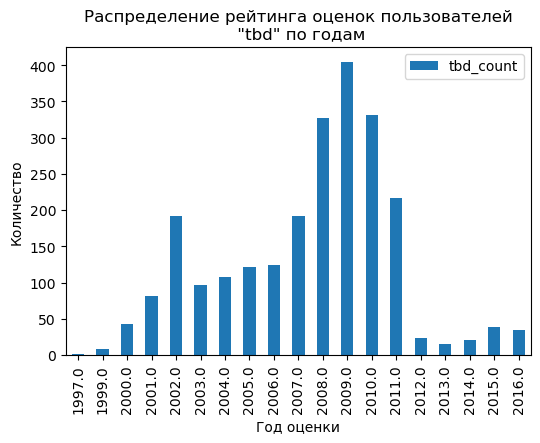

In [12]:
# Построим гистограмму распределения tbd по годам
df_tbd = df.query('user_score == "tbd"')
df_tbd_grouped = df_tbd.groupby('year_of_release').agg(tbd_count = ("user_score",'count')) 
df_tbd_grouped.reset_index()
df_tbd_grouped.plot(y='tbd_count', kind='bar', figsize=(6, 4))
plt.title('Распределение рейтинга оценок пользователей\n "tbd" по годам')
plt.xlabel('Год оценки')
plt.ylabel('Количество');

Получается, что оценка `tbd`, to be determined присутствует как для новых, так и для старых игр. Это или некорректные данные, либо оценка 0. Проверим есть ли нулевые оценки игр.

In [13]:
# Вывод строк с нулевыми оцеками пользователями игр.
df.loc[df['user_score'] == 0]['user_score'].count()

0

In [14]:
# Количество пропусков в 'user_score'
df['user_score'].isna().sum()

6699

In [15]:
# Количество оценок 'tbd' в 'user_score'
df.loc[df['user_score'] == 'tbd', 'user_score'].count()

2424

Для дальнейшей работы с  данными, заполним пропуски в `year_of_release` нулями, `user_score` и значений `tbd` также нулями, оставшиеся пропуски в `critic_score` заполним медианным значением на основе соответствующих оценок `user_score`, оставшиеся также заполним нулями. Для вычислений по этим столбцам, скорее всего нужно будет отбрасывать значения с `0`

In [16]:
# заполняем нулями строки с пропусками и 'tbd' в 'user_score' и пропуски в 'year_of_release'
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0
df['user_score'] = df['user_score'].fillna(0)
df['year_of_release'] = df['year_of_release'].fillna(0)
# меняем тип данных этих столбцов
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


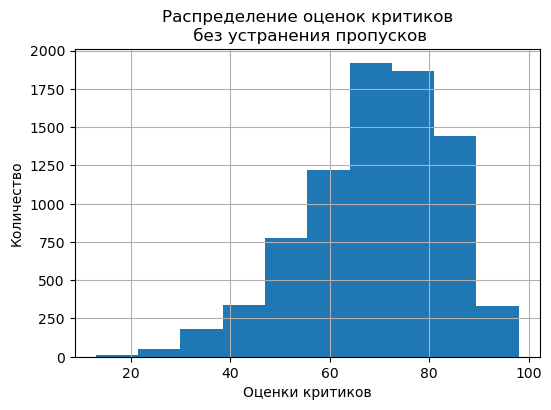

In [17]:
# Распределение оценок критиков без устранения пропусков
df['critic_score'].hist(bins=10, figsize=(6, 4))
plt.title('Распределение оценок критиков\n без устранения пропусков')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество');

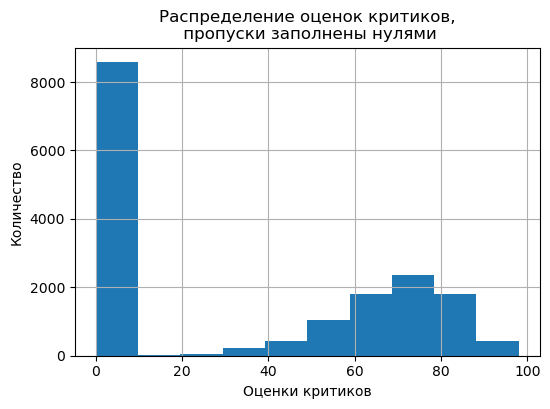

In [18]:
# Распределение оценок критиков, пропуски заполнены нулями
df_critic_zero = df
df_critic_zero = df_critic_zero['critic_score'].fillna(0)
df_critic_zero.hist(bins=10, figsize=(6, 4))
plt.title('Распределение оценок критиков,\n пропуски заполнены нулями')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество');

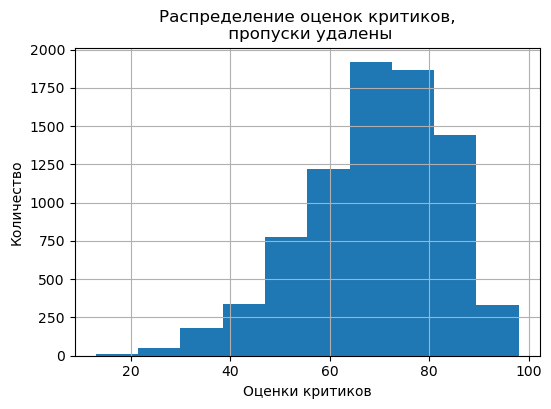

In [19]:
# Распределение оценок критиков, пропуски удалены
df_critic_drop = df
df_critic_drop = df_critic_drop['critic_score'].dropna()
df_critic_drop.hist(bins=10, figsize=(6, 4))
plt.title('Распределение оценок критиков,\n пропуски удалены')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество');

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [21]:
df_test = df.loc[:, ['critic_score', 'user_score']]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [23]:
df_test.head(5)

,critic_score,user_score
0,76.0,8.0
1,NaN,0.0
2,82.0,8.3
3,80.0,8.0
4,NaN,0.0


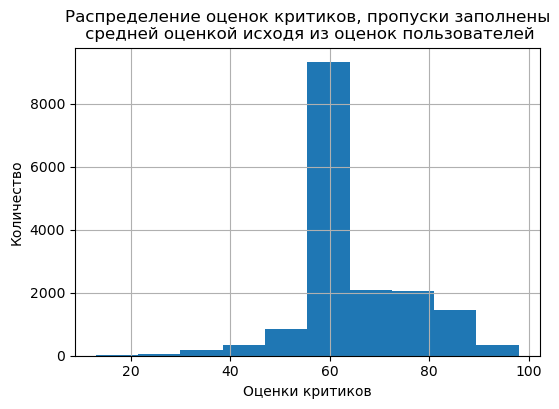

In [24]:
for i in df_test['user_score'].unique():
    df_test.loc[(df_test['user_score'] == i)&(df_test['critic_score'].isna()), 'critic_score'] = \
    df_test.loc[(df_test['user_score'] == i), 'critic_score'].mean()
df_test_critic = df_test['critic_score']
df_test_critic.hist(bins=10, figsize=(6, 4))
plt.title('Распределение оценок критиков, пропуски заполнены\n средней оценкой исходя из оценок пользователей')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество');

Рассмортены для столбца `critic-score` варинаты с сохранением пропусков, заполнением пропусков нулями, заполненем средним значением на основе значений `user score`, удалением пропусков.  
Удаление пропусков не подходит, потеряем больше половины данных. Заполнение средним значением вносит большие искажения в данные. Предлагаю заполнить нулями, при статистических расчетах по столбцу с оценками критиков отбрасывать эти значения. Если оставить пропуски, то при прверке статистических гипотез по этому столбцу методы не сработают.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [26]:
# Пропуски в 'critic_score'  заполним нулями
df['critic_score'] = df['critic_score'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [27]:
# Пропуски в столбце 'rating'
df['rating'].isna().sum()

6764

In [28]:
df.query('rating.isna() == True').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0.0,0.0,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0.0,0.0,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0.0,0.0,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,0.0,0.0,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,0.0,0.0,NaN


In [29]:
df.query('rating.isna() == True').tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,0.0,0.0,NaN
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,0.0,0.0,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,0.0,0.0,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,0.0,0.0,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,0.0,0.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,0.0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,0.0,0.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,0.0,0.0,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,0.0,0.0,NaN


In [30]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
# Заполним пропуски категорией 'nd' = "no data"
df['rating'] = df['rating'].fillna('nd')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [32]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [33]:
# Обработка дубликатов
df.duplicated().sum()

0

In [34]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,nd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,nd
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,nd
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,nd


Гистограммы по всем столбцам таблицы


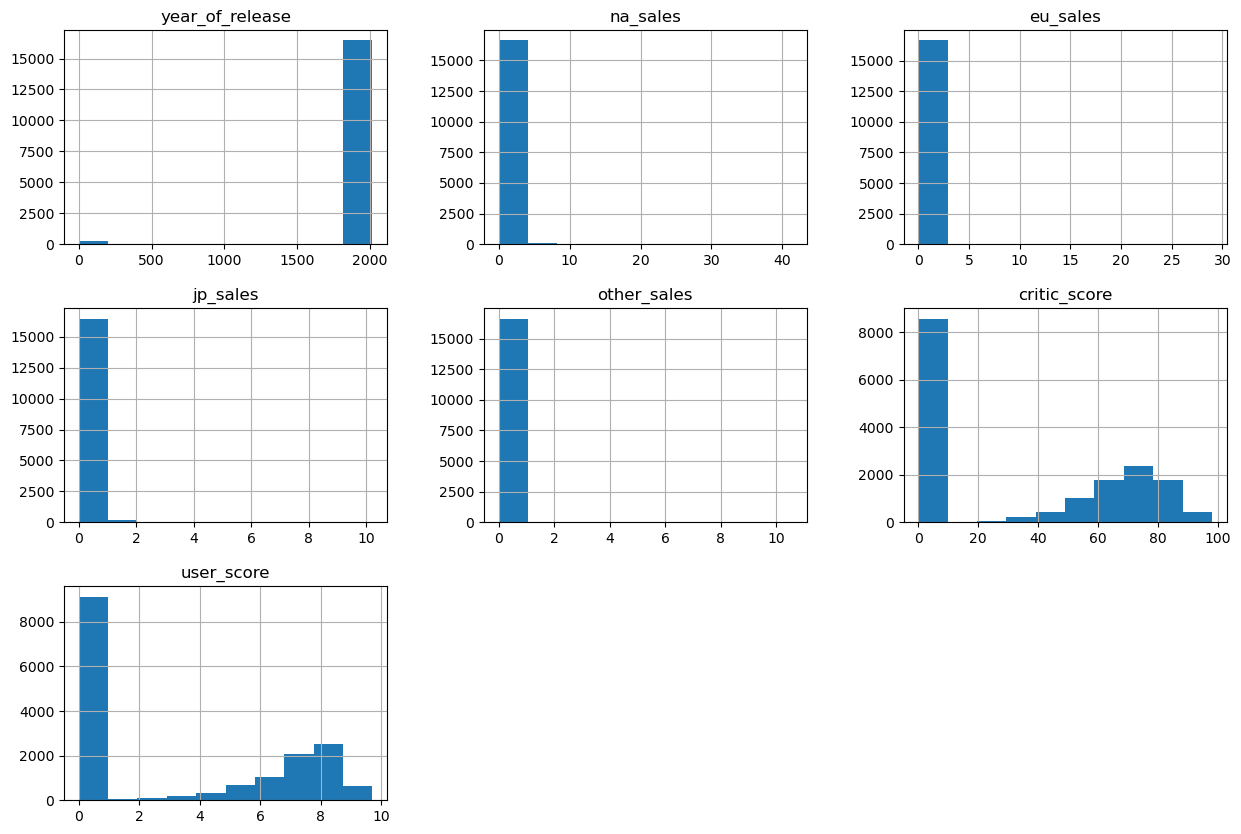

In [35]:
print('Гистограммы по всем столбцам таблицы')
df.hist(figsize=(15,10));

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [37]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,nd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,nd,31.38


В результате очистки и подготовки данных были произведены следующие действия:
- Заполнили часть пропусков в столбце с годом выпуска игры исходя из года в ее названии.
- Оставшиеся пропуски в столбце с годом выпуска игры заполнили нулями
- избавились от пропусков (2 шт.) в стобцах с названием игры и жанра
- исследовали категорию 'tbd' (to be determined) в оценках пользователей, оказалось, что она присутствует и в строках для старых игр
- заполнили пропуски в категории 'tbd' в столбце с оценками пользователей нулями
- часть пропусков в оценках критиков заполнили средним значением для оценок критиков, если для них были соответствующие оценки пользователей. Оставшиеся пропуски заполнили нулями.
- изменили тип данных столбцов для экономии вычислений и памяти, используемой программой: столбец 'year_of_release' стал целочисленным, 'user_score' - числовым с плавающей точкой.
- Пропуски в столбце с рейтингом заполнили значением `nd` = нет данных 
- Дубликатов в данных не обнаружено
- Добавили столбец с суммарными продажами  
Для дальнейшего анализа запоминаем, что часть пропуков заполнили индикаторными значениями, которые лучше отбрасывать при вычилсениях. Поскольку данные собирались из открытых источников сложно сделать выводы о причинах появления проблем в исходных данных. Возможно, это связано с ошибками сборщиков данных. Заполнять пропуски средними или медианными значениями было не возможно, это могло вызвать смещения в данных и ошибки в дальнейшем анализе.

<a id='analysis'></a>
## Исследовательский анализ данных
Вопросы для исследования:
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы? 
- Определить актуальный период по предыдущим вопросам. Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы. Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

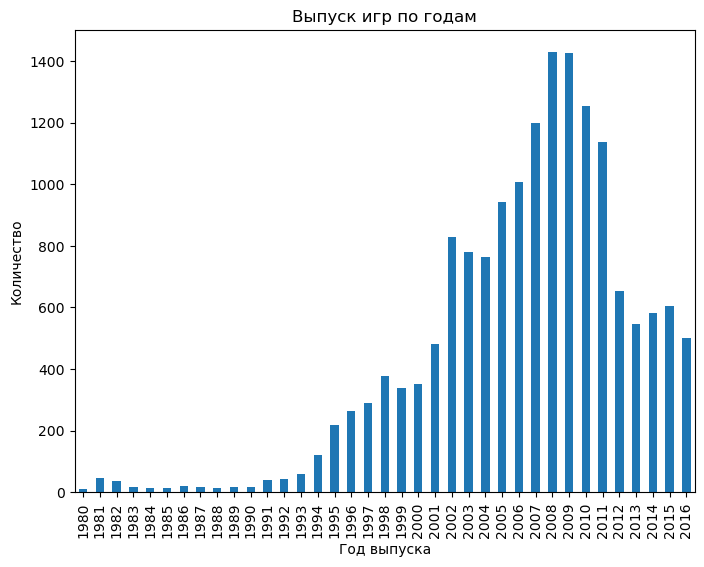

In [38]:
# Числовое распределение игр по годам
df_clear = df.loc[df['year_of_release'] != 0]
df_clear.groupby('year_of_release')['name'].count().plot(kind='bar', title='Выпуск игр по годам', figsize=(8, 6))
plt.xlabel('Год выпуска')
plt.ylabel('Количество');

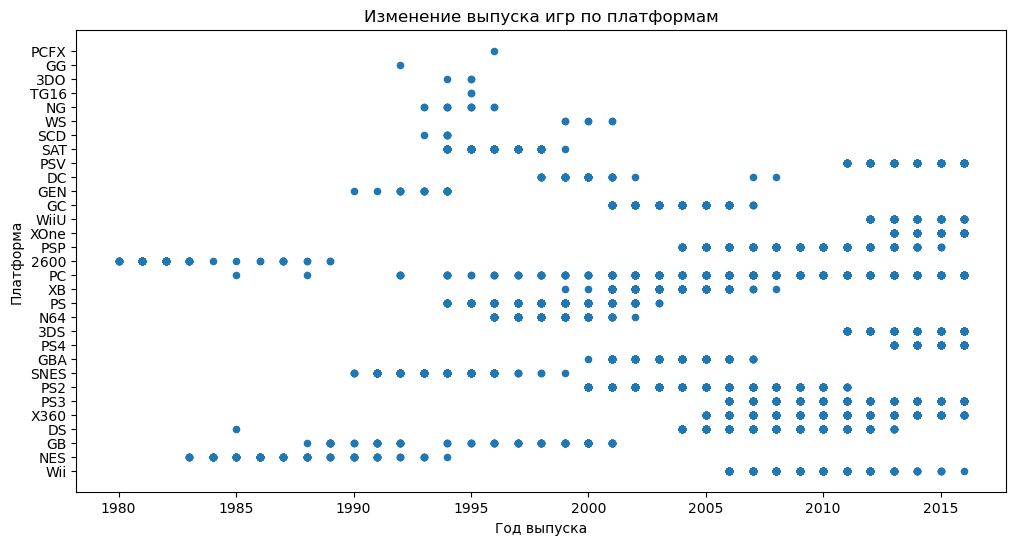

In [39]:
# Изменение выпуска игр по платформам
df_clear.plot(x='year_of_release', y='platform', kind='scatter', figsize=(12, 6))
plt.title('Изменение выпуска игр по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа');

Похоже, что до 2000 года выпускалось значительно меньше игр и было меньше игровых платформ. Не все платформы существуют в 2016 году. Пример: 2600, NES, GB.

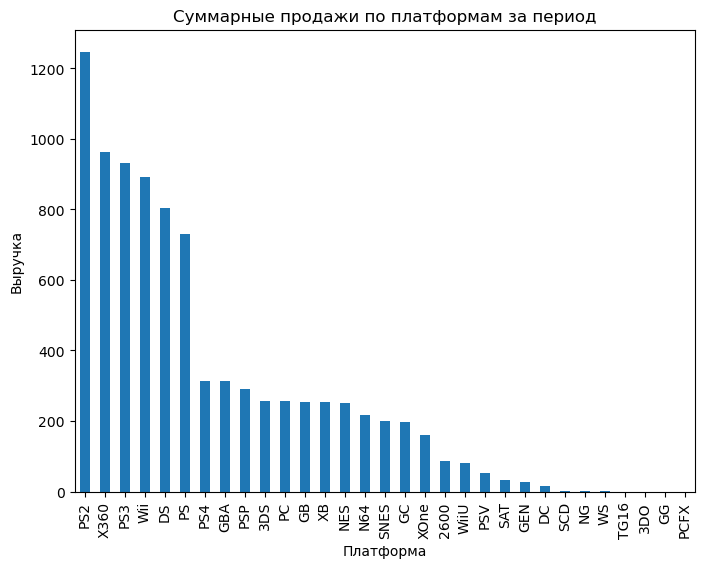

In [40]:
df_clear.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))\
.set(title='Суммарные продажи по платформам за период')
plt.xlabel('Платформа')
plt.ylabel('Выручка');

Рассмотрим, каков срок жизни платформы.

In [41]:
df_clear_platform = df_clear.loc[:,['year_of_release','platform']]
df_clear_platform = df_clear_platform.drop_duplicates()
df_clear_platform_pivot = df_clear_platform.pivot_table(
    index=['platform'], 
    values=['year_of_release'], 
    aggfunc='count'
    )
df_clear_platform_pivot.reset_index(inplace=True)
df_clear_platform_pivot

,platform,year_of_release
0,2600,10
1,3DO,2
2,3DS,6
3,DC,7
4,DS,11
5,GB,13
6,GBA,8
7,GC,7
8,GEN,5
9,GG,1


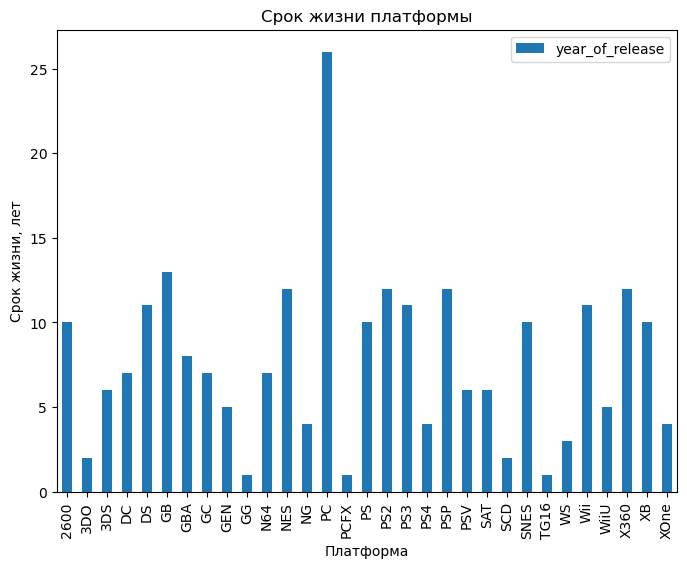

In [42]:
df_clear_platform_pivot.plot(
    y='year_of_release', 
    x='platform',
    kind='bar', 
    title='Срок жизни платформы', 
    figsize=(8, 6))
plt.xlabel('Платформа')
plt.ylabel('Срок жизни, лет')
plt.show();

In [43]:
df_clear_platform_pivot['year_of_release'].describe()

count    31.000000
mean      7.709677
std       5.093745
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Вывод: средний срок жизни платформы 7 лет. Актуальный срок исследования можно принять в 11 лет (3 квартиль).

In [44]:
# Продажи по платформам в актуальном периоде.
df_clear_actual = df_clear.loc[df_clear['year_of_release'] > (2016-11)]
df_clear_actual_platform_pivot = df_clear_actual.pivot_table(index=['platform'], values=['sum_sales'], aggfunc='sum')
df_clear_actual_platform_pivot.sort_values(by='sum_sales', ascending=False).head(10)

,sum_sales
platform,
X360,953.05
PS3,931.34
Wii,891.18
DS,655.36
PS4,314.14
PS2,268.84
3DS,257.81
PSP,239.44
PC,163.77


In [45]:
# Актуальные платформы для исследования
actual_platforms = ['X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS2', '3DS', 'PSP', 'PC', 'XOne']

In [46]:
df_clear_actual_platforms = df_clear_actual.loc[df['platform'].isin(actual_platforms)]
df_clear_actual_platforms = df_clear_actual_platforms.reset_index(drop=True)
df_clear_actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


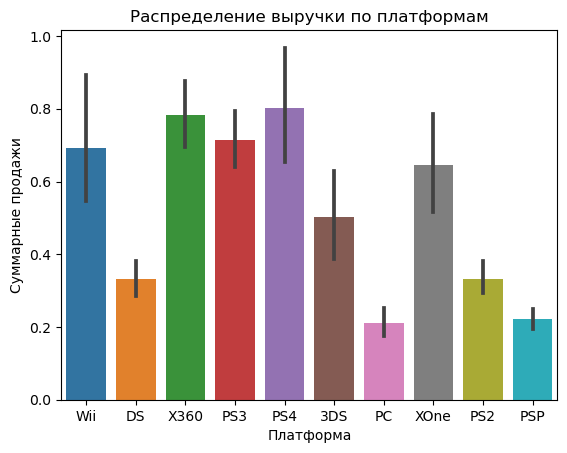

In [47]:
# Продажи игр по платформам
sns.barplot(data = df_clear_actual_platforms, x='platform', y='sum_sales').set(title='Распределение выручки по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show();

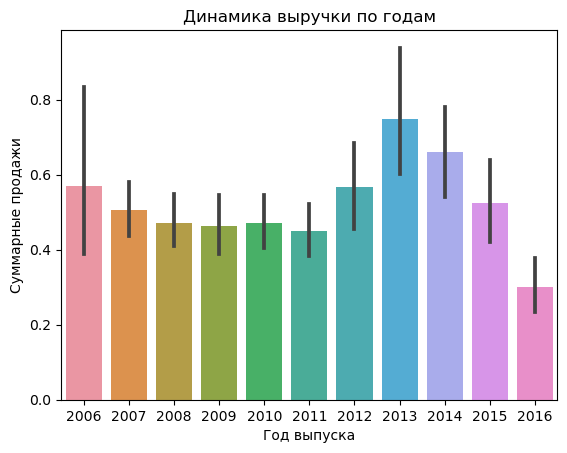

In [48]:
# Динамика выручучки по годам
sns.barplot(data = df_clear_actual_platforms, x='year_of_release', y='sum_sales').set(title='Динамика выручки по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.show();

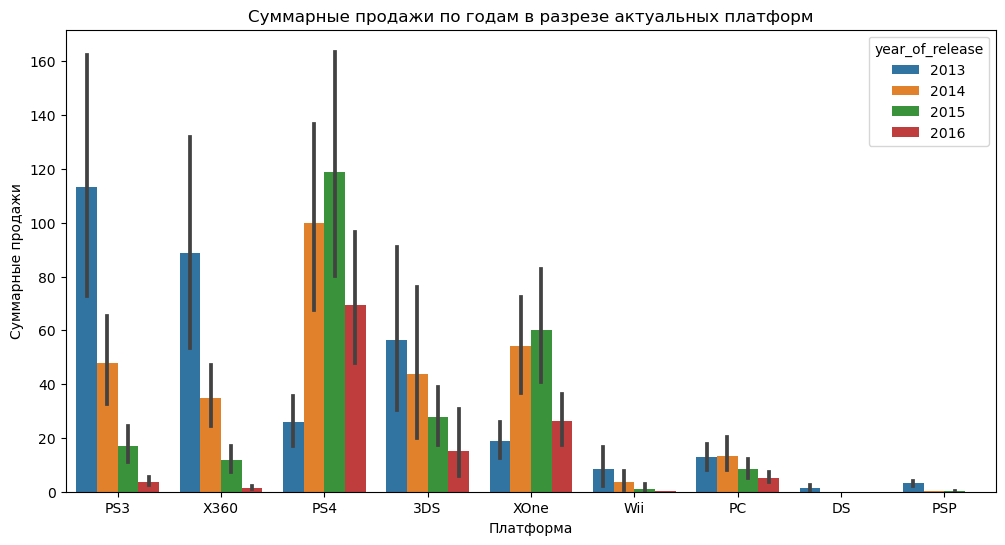

In [49]:
# суммарные продажи по годам в разрезе актуальных платформ
last_years = [2013, 2014, 2015, 2016]
df_last_years = df_clear_actual_platforms.loc[(df_clear_actual_platforms['year_of_release'].isin(last_years))]
sns.barplot(data = df_last_years, x='platform', y='sum_sales', hue='year_of_release', estimator=sum).figure.set_size_inches(12,6);
plt.title('Cуммарные продажи по годам в разрезе актуальных платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show();

Лидируют по продажам платформы PS4, PS3, X360, XOne, 3DS, PC. Начиная с 2013 года на рынке компьютерных игр наблюдаеся спад. Этот тренд действет и для актуальных в настоящее время игровых платформ.

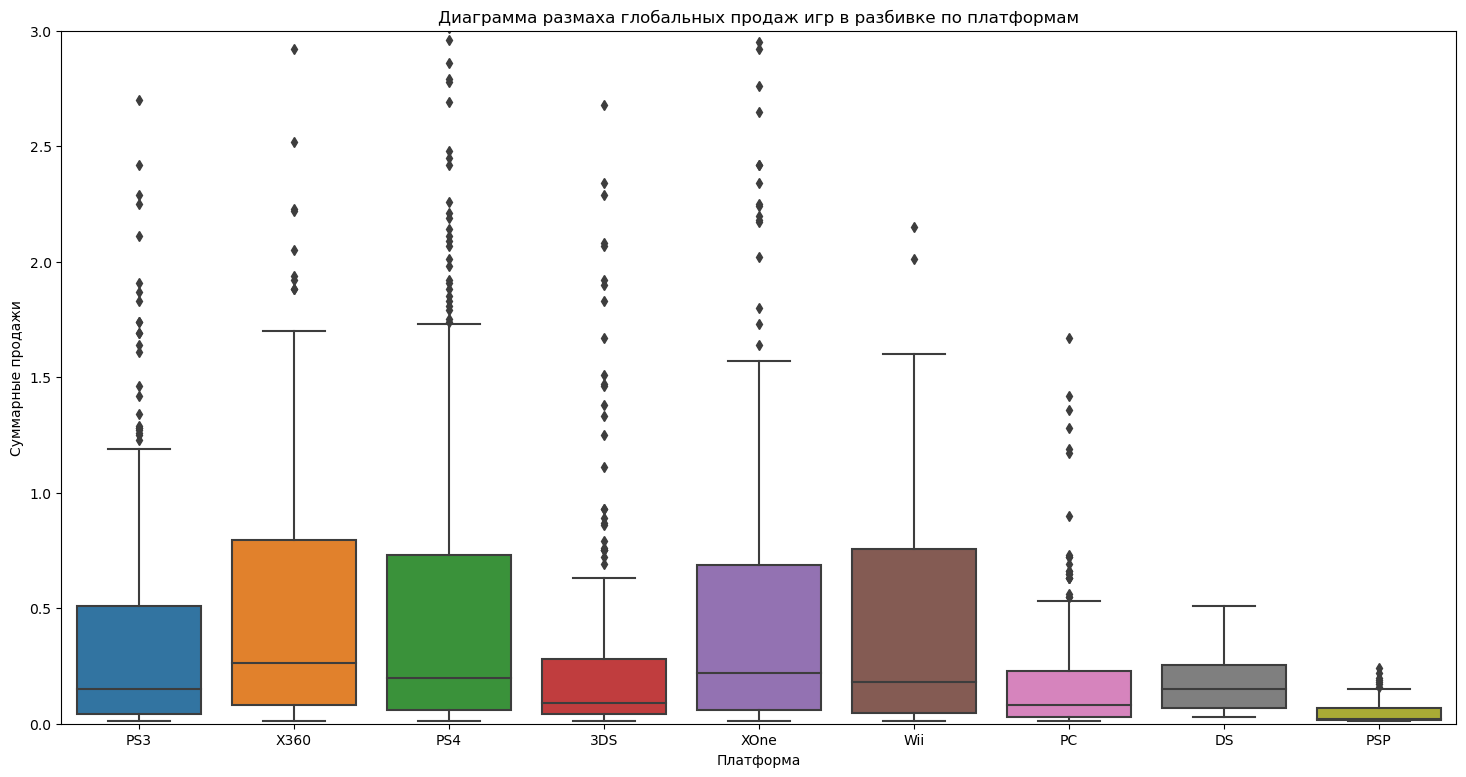

In [50]:
sns.boxplot(x=df_last_years['platform'], y=df_last_years['sum_sales']).figure.set_size_inches(18,9);
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по платформам');
plt.ylim(0, 3)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show();

Распределение данных ассиметричное, медиана смещена в сторону Q1, первого квартиля. Есть выбросы, выходящие за пределы нормального распределения в верхнюю сторону.

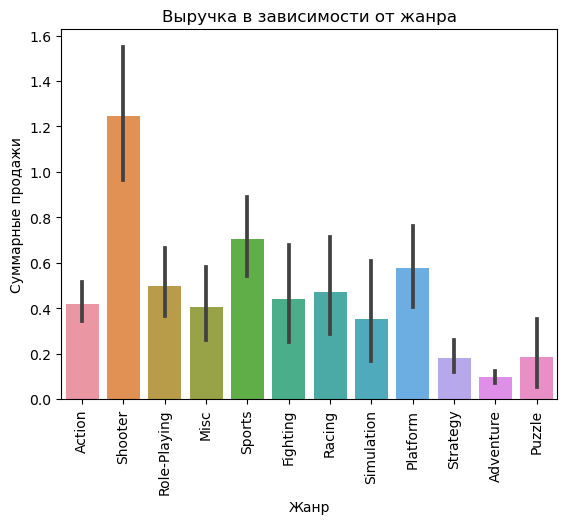

In [51]:
# Выручка в зависимости от жанра
df_clear_last_years = df_clear.loc[df_clear['year_of_release'].isin(last_years)]
sns.barplot(data = df_clear_last_years, x='genre', y='sum_sales')\
.set(title='Выручка в зависимости от жанра')
plt.xticks(rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show();

Выделяются по выручке жанры с высокими продажами: `Shooter`, `Sports`, `Platform`. Для оценки прибыльности не хватает затрат. Вероятно, затраты на создание игры жанра `Shooting` выше, чем на создание игры жанра `Puzzle`.

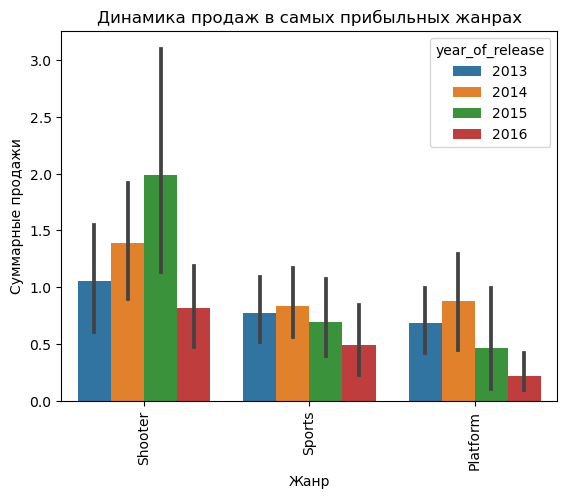

In [52]:
# Динамика продаж в самых прибыльных жанрах.
df_clear_last_years_genre = df_clear_last_years.loc[df_clear_last_years['genre'].isin(['Shooter', 'Sports', 'Platform'])]
sns.barplot(data = df_clear_last_years_genre, x='genre', y='sum_sales', hue='year_of_release')\
.set(title='Динамика продаж в самых прибыльных жанрах')
plt.xticks(rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show();

В самых прибыльных жанрах эффект общего спада продаж начал сказываться позже, в 2014 году. Самый прибыльный жанр `Shooter` демонстрировал увереннный рост в 2013-2015 годах.

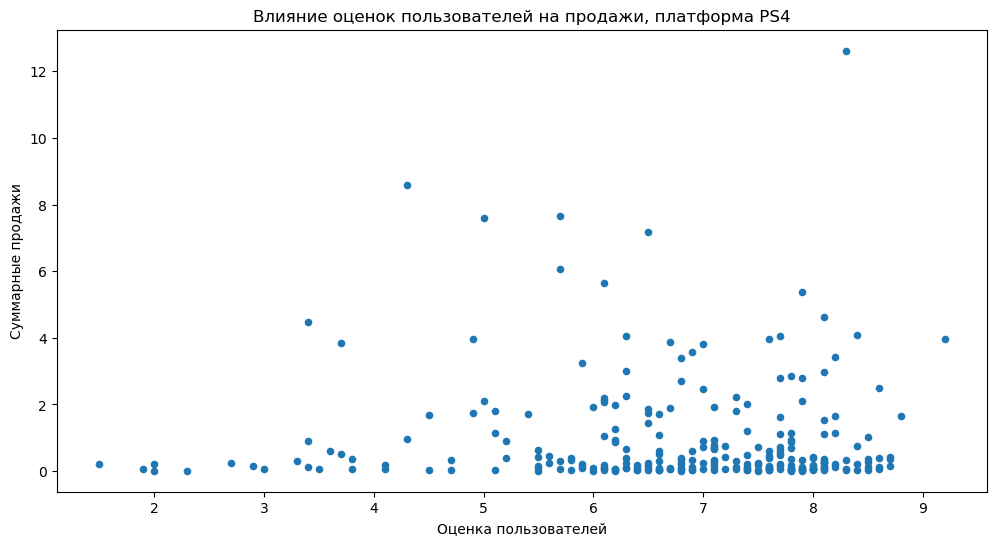

In [53]:
# Влияние оценок пользователей на популярную платформу PS4.
df_ps4 = df.loc[(df['year_of_release']>2012) & (df['user_score']>0) &(df['platform'] == 'PS4')]
df_ps4.plot(x='user_score', y='sum_sales', kind='scatter',\
            title='Влияние оценок пользователей на продажи, платформа PS4', figsize=(12, 6))
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show();              

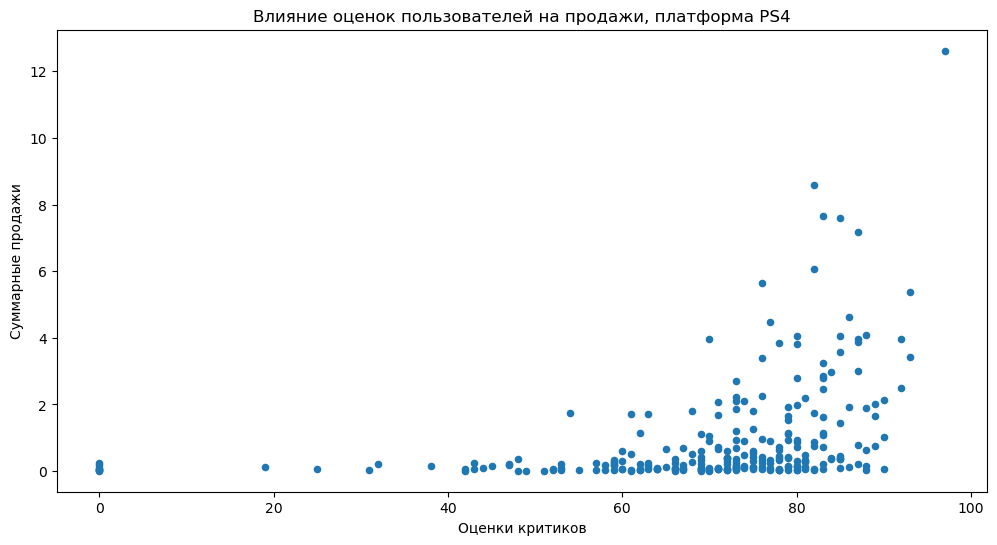

In [54]:
# Влияние оценок критиков на популярную платформу PS4.
df_ps4_2 = df.loc[(df['year_of_release']>2012) & (df['critic_score']>0) &(df['platform'] == 'PS4')]
df_ps4.plot(x='critic_score', y='sum_sales', kind='scatter',\
            title='Влияние оценок пользователей на продажи, платформа PS4', figsize=(12, 6))
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show();

In [55]:
# Корреляция Пирсона между продажами и оценкам пользователей и оцеками критиков.
df_ps4_3 = df.loc[(df['year_of_release']>2012) & (df['user_score']>0) & (df['critic_score']>0) &(df['platform'] == 'PS4')]
print('Коэффициент корреляции Пирсона:')
print('Продажи - оценка пользователей=', df_ps4_3['sum_sales'].corr(df_ps4_3['user_score']))
print('Продажи - оценка критиков=', df_ps4_3['sum_sales'].corr(df_ps4_3['critic_score']))

Коэффициент корреляции Пирсона:
Продажи - оценка пользователей= -0.03362497596528878
Продажи - оценка критиков= 0.40589480145836687


По графикам и расчетам коэффициента корреляции Пирсона для популярной платформы `PS4` можно сделать вывод о том, что между продажами и оцекой пользоватлей нет линейной связи, между оценками критиков и продажами есть слабая связь. Это можно объяснить тем, что потенциальные покупатели отчасти ориентируются на высокие оценки критиков перед приобретением игры и не отслеживают оценки других пользователей по причине недоверия к подобным рейтингам (проблема проплаченных отзывов, ботов) или работает только личная рекомендация от знакомых.

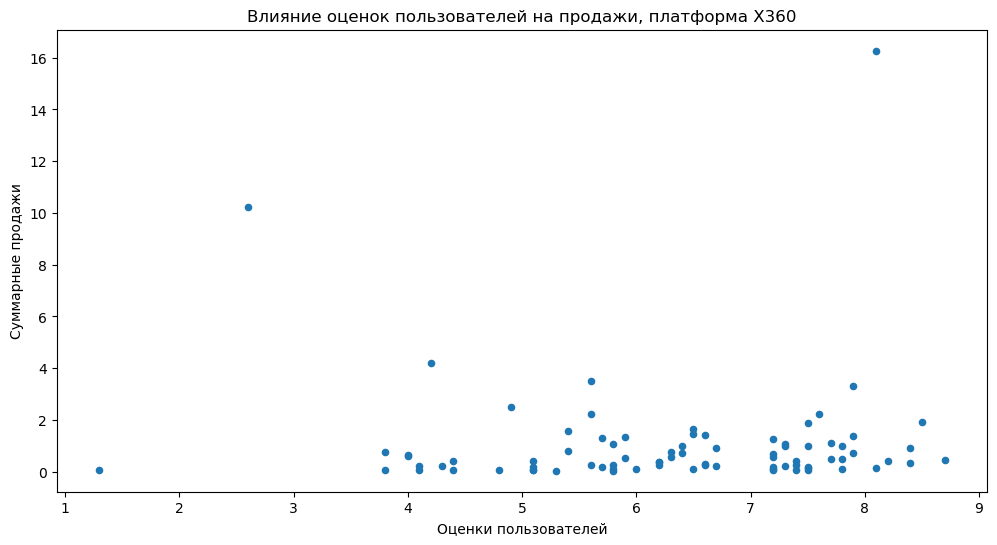

In [56]:
# Аналогичные расчеты для платформы X360
# Влияние оценок пользователей на популярную платформу PS4.
df_x360 = df.loc[(df['year_of_release']>2012) & (df['critic_score']>0) & (df['user_score']>0) &(df['platform'] == 'X360')]
df_x360.plot(x='user_score', y='sum_sales', kind='scatter',\
            title='Влияние оценок пользователей на продажи, платформа X360', figsize=(12, 6))  
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.show();

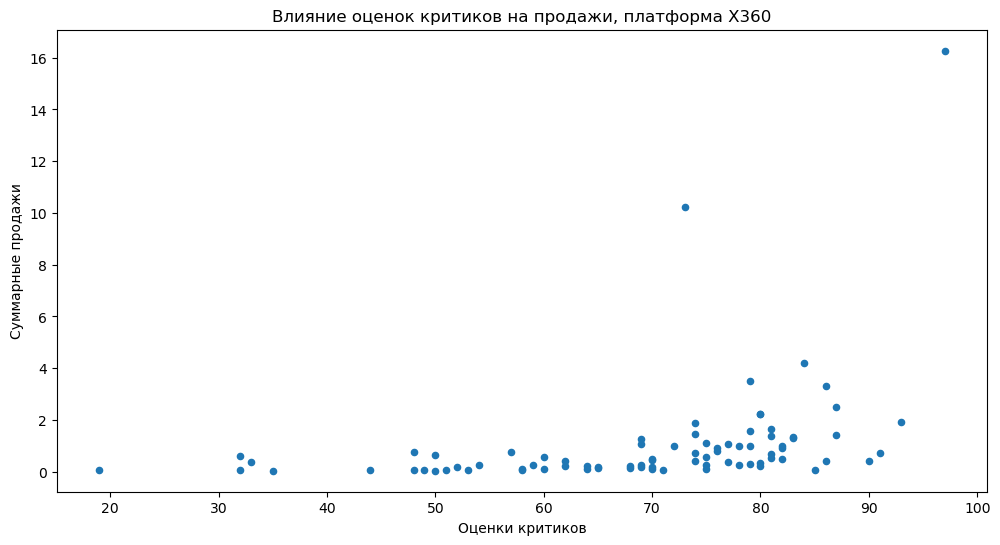

In [57]:
df_x360.plot(x='critic_score', y='sum_sales', kind='scatter',\
            title='Влияние оценок критиков на продажи, платформа X360', figsize=(12, 6))
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.show();

In [58]:
print('Коэффициент корреляции Пирсона:')
print('Продажи - оценка пользователей=', df_x360['sum_sales'].corr(df_x360['user_score']))
print('Продажи - оценка критиков=', df_x360['sum_sales'].corr(df_x360['critic_score']))

Коэффициент корреляции Пирсона:
Продажи - оценка пользователей= -0.006238179532306317
Продажи - оценка критиков= 0.3503445460228664


Для платформы `X360` получены аналогичные результаты

**Выводы по проведенному исследовательскому анализу данных.**  
- После 2000 года на рынке компьтерных игр наблюдалос увеличение числа платформ и количества выпускаемых игр. После 2010 года этод сформиловался понижающий тренд. Для анализа важен период с 2012 года.
- Средний срок жизни платформы составляет 7 лет, 75% платформ существуют 11 лет.
- Лидируют по продажам платформы PS4, X360, XOne, PS3, Wii. Но для них также действует тренд на снижение продаж.
- Выделяются по выручке жанры с высокими продажами: Shooter, Sports, Platform. Жанр Shooter демонстрировал рост продаж в период с 2013 по 2015 год, несмотря на общее падение продаж. Спад продаж произошел в этом жанре только в 2016 году. 
- Оценки критиков слабо влияют на продажи, между оценками пользователей и проаджами линейной связи не выявлено.

<a id='users'></a>
## Портрет пользователя каждого региона
Вопросы для исследования:
- ТОП5 популярных платформ
- ТОП5 популярных жанров
- Влияние рейтинга ESRB на продажи

In [59]:
# Выбираем год больше 2012 и актуальные платформы
df_portrait = df.loc[(df['year_of_release']>2012) & (df['platform'].isin(actual_platforms))]
df_portrait.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,nd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,nd,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [60]:
# Сводная таблица для платформ
df_portrait.platform.pivot = df_portrait.pivot_table(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'],\
                                                     ['platform'], aggfunc='sum')
df_portrait.platform.pivot

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
3DS,30.96,67.81,38.20,6.28,143.25
DS,0.85,0.00,0.57,0.12,1.54
PC,25.61,0.00,11.17,3.00,39.78
PS3,67.81,23.35,63.50,26.77,181.43
PS4,141.09,15.96,108.74,48.35,314.14
PSP,0.17,3.29,0.00,0.04,3.50
Wii,5.93,0.05,6.56,1.12,13.66
X360,42.52,0.51,81.66,12.11,136.80
XOne,51.59,0.34,93.12,14.27,159.32


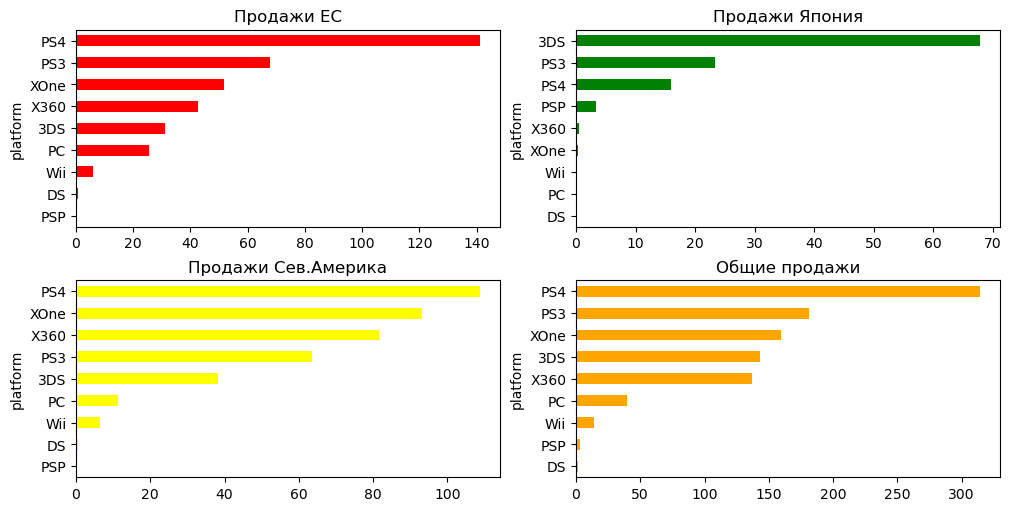

In [61]:
# Распределение продаж по платформам в зависимотси от региона.
fg = plt.figure(figsize=(10, 5), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])
df_portrait.platform.pivot['eu_sales'].sort_values(ascending=True).plot.barh(color='red').set(title='Продажи ЕС')
fig_ax_2 = fg.add_subplot(gs[0, 1])
df_portrait.platform.pivot['jp_sales'].sort_values(ascending=True).plot.barh(color='green').set(title='Продажи Япония')
fig_ax_3 = fg.add_subplot(gs[1, 0])
df_portrait.platform.pivot['na_sales'].sort_values(ascending=True).plot.barh(color='yellow').set(title='Продажи Сев.Америка')
fig_ax_4 = fg.add_subplot(gs[1, 1])
df_portrait.platform.pivot['sum_sales'].sort_values(ascending=True).plot.barh(color='orange').set(title='Общие продажи');

In [62]:
# Расчет доли продаж ТОП5 платформ рынках
df_portrait.platform.pivot['eu_sales_share'] = df_portrait.platform.pivot['eu_sales'] / df_portrait.platform.pivot['eu_sales'].sum()
df_portrait.platform.pivot['jp_sales_share'] = df_portrait.platform.pivot['jp_sales'] / df_portrait.platform.pivot['jp_sales'].sum()
df_portrait.platform.pivot['na_sales_share'] = df_portrait.platform.pivot['na_sales'] / df_portrait.platform.pivot['na_sales'].sum()
df_portrait.platform.pivot.head(5)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales,eu_sales_share,jp_sales_share,na_sales_share
platform,,,,,,,,
3DS,30.96,67.81,38.20,6.28,143.25,0.084468,0.609200,0.094667
DS,0.85,0.00,0.57,0.12,1.54,0.002319,0.000000,0.001413
PC,25.61,0.00,11.17,3.00,39.78,0.069871,0.000000,0.027681
PS3,67.81,23.35,63.50,26.77,181.43,0.185005,0.209775,0.157365
PS4,141.09,15.96,108.74,48.35,314.14,0.384934,0.143383,0.269479


In [63]:
# Доли рынка платформ в ЕС.
print('Доля рынка ТОП5 игровых платформ в ЕС')
df_portrait.platform.pivot['eu_sales_share'].sort_values(ascending=False).head(5)

Доля рынка ТОП5 игровых платформ в ЕС


platform
PS4     0.384934
PS3     0.185005
XOne    0.140752
X360    0.116007
3DS     0.084468
Name: eu_sales_share, dtype: float64

In [64]:
# Доли рынка платформ в Японии.
print('Доля рынка ТОП5 игровых платформ в Японии')
display(df_portrait.platform.pivot['jp_sales_share'].sort_values(ascending=False).head(5))

Доля рынка ТОП5 игровых платформ в Японии


platform
3DS     0.609200
PS3     0.209775
PS4     0.143383
PSP     0.029557
X360    0.004582
Name: jp_sales_share, dtype: float64

In [65]:
# Доли рынка платформ в Сев.Америке.
print('Доля рынка ТОП5 игровых платформ в Северной Америке')
df_portrait.platform.pivot['na_sales_share'].sort_values(ascending=False).head(5)

Доля рынка ТОП5 игровых платформ в Северной Америке


platform
PS4     0.269479
XOne    0.230769
X360    0.202369
PS3     0.157365
3DS     0.094667
Name: na_sales_share, dtype: float64

**Выводы:**
1. Самые популярные игровые платформы в зависимости от региона:
- Европа: PS4, PS3, XOne, X360, 3DS
- Япония: 3DS, PS3, PS4, PSP, X360
- Сев.Америка: PS4, XOne, X360, PS3, 3DS
Распределение игровых платформ по полярности не совпадает по регионам. Предпочтения Японцев сильно отличаются от Европейцев и Северной Америки. В Европе и Сев.Америке совпадает лидер - PS4, но вторые и третьи места не совпадают и доли различаются.

In [66]:
# Сводная таблица для жанров
df_portrait.genre.pivot = df_portrait.pivot_table(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'],\
                                                     ['genre'], aggfunc='sum')
df_portrait.genre.pivot

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
genre,,,,,
Action,111.18,33.66,117.74,35.17,297.75
Adventure,7.59,3.88,6.48,2.07,20.02
Fighting,6.97,6.00,12.10,2.96,28.03
Misc,16.87,5.17,24.31,5.24,51.59
Platform,10.40,2.34,10.34,2.81,25.89
Puzzle,0.61,0.91,0.21,0.06,1.79
Racing,17.91,0.93,9.68,3.91,32.43
Role-Playing,35.46,43.53,44.15,10.59,133.73
Shooter,85.79,5.02,107.14,28.11,226.06


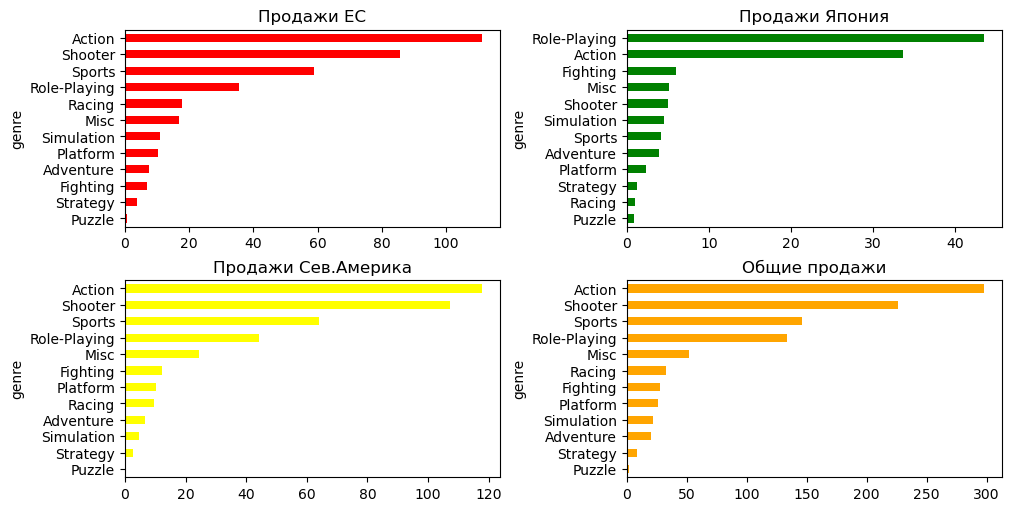

In [67]:
# Распределение продаж по жанрам в зависимотси от региона.
fg = plt.figure(figsize=(10, 5), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])
df_portrait.genre.pivot['eu_sales'].sort_values(ascending=True).plot.barh(color='red').set(title='Продажи ЕС')
fig_ax_2 = fg.add_subplot(gs[0, 1])
df_portrait.genre.pivot['jp_sales'].sort_values(ascending=True).plot.barh(color='green').set(title='Продажи Япония')
fig_ax_3 = fg.add_subplot(gs[1, 0])
df_portrait.genre.pivot['na_sales'].sort_values(ascending=True).plot.barh(color='yellow').set(title='Продажи Сев.Америка')
fig_ax_4 = fg.add_subplot(gs[1, 1])
df_portrait.genre.pivot['sum_sales'].sort_values(ascending=True).plot.barh(color='orange').set(title='Общие продажи');

In [68]:
# Расчет доли продаж ТОП5 жанров на рынках
df_portrait.genre.pivot['eu_sales_share'] = df_portrait.genre.pivot['eu_sales'] / df_portrait.genre.pivot['eu_sales'].sum()
df_portrait.genre.pivot['jp_sales_share'] = df_portrait.genre.pivot['jp_sales'] / df_portrait.genre.pivot['jp_sales'].sum()
df_portrait.genre.pivot['na_sales_share'] = df_portrait.genre.pivot['na_sales'] / df_portrait.genre.pivot['na_sales'].sum()
df_portrait.genre.pivot.head(5)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales,eu_sales_share,jp_sales_share,na_sales_share
genre,,,,,,,,
Action,111.18,33.66,117.74,35.17,297.75,0.303331,0.302399,0.291782
Adventure,7.59,3.88,6.48,2.07,20.02,0.020708,0.034858,0.016059
Fighting,6.97,6.00,12.10,2.96,28.03,0.019016,0.053904,0.029986
Misc,16.87,5.17,24.31,5.24,51.59,0.046026,0.046447,0.060245
Platform,10.40,2.34,10.34,2.81,25.89,0.028374,0.021022,0.025625


In [69]:
# Доли рынка жанров в Японии.
print('Доля рынка ТОП5 игровых жанров в Японии')
df_portrait.genre.pivot['jp_sales_share'].sort_values(ascending=False).head(5)

Доля рынка ТОП5 игровых жанров в Японии


genre
Role-Playing    0.391070
Action          0.302399
Fighting        0.053904
Misc            0.046447
Shooter         0.045099
Name: jp_sales_share, dtype: float64

In [70]:
# Доли рынка жанорв в EC.
print('Доля рынка ТОП5 игровых жанров в ЕС')
df_portrait.genre.pivot['eu_sales_share'].sort_values(ascending=False).head(5)

Доля рынка ТОП5 игровых жанров в ЕС


genre
Action          0.303331
Shooter         0.234060
Sports          0.161078
Role-Playing    0.096745
Racing          0.048864
Name: eu_sales_share, dtype: float64

In [71]:
# Доли рынка жанров в NA.
print('Доля рынка ТОП5 игровых жанров в Сев.Америке')
df_portrait.genre.pivot['na_sales_share'].sort_values(ascending=False).head(5)

Доля рынка ТОП5 игровых жанров в Сев.Америке


genre
Action          0.291782
Shooter         0.265513
Sports          0.158356
Role-Playing    0.109412
Misc            0.060245
Name: na_sales_share, dtype: float64

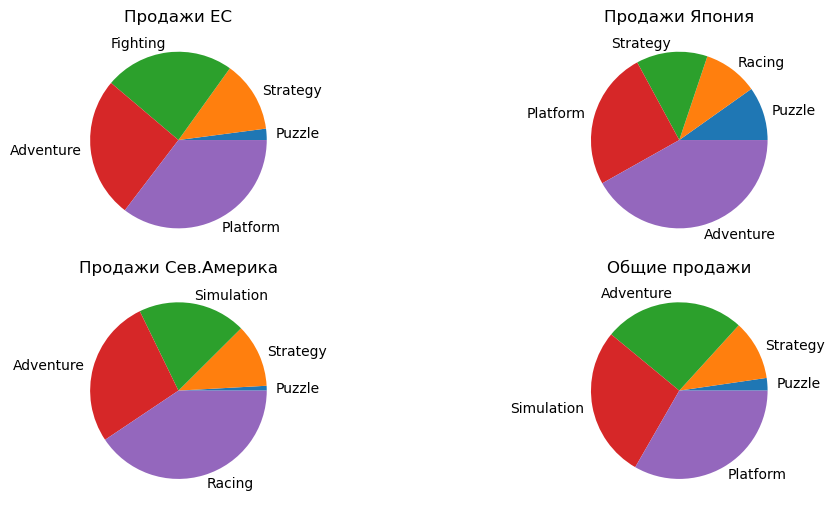

In [72]:
# Распределение продаж по ТОП5 жанров в зависимотси от региона.
fg = plt.figure(figsize=(10, 5), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])
df_portrait.genre.pivot['eu_sales'].sort_values(ascending=True).head(5).plot.pie().set(title='Продажи ЕС', ylabel=None)
fig_ax_2 = fg.add_subplot(gs[0, 1])
df_portrait.genre.pivot['jp_sales'].sort_values(ascending=True).head(5).plot.pie().set(title='Продажи Япония',  ylabel=None)
fig_ax_3 = fg.add_subplot(gs[1, 0])
df_portrait.genre.pivot['na_sales'].sort_values(ascending=True).head(5).plot.pie().set(title='Продажи Сев.Америка',ylabel=None)
fig_ax_4 = fg.add_subplot(gs[1, 1])
df_portrait.genre.pivot['sum_sales'].sort_values(ascending=True).head(5).plot.pie().set(title='Общие продажи', ylabel=None);

**Выводы:**
1. Самые популярные платформы.
- Европа: PS4, PS3, XOne, X360, 3DS
- Япония: 3DS, PS3, PS4, PSP, X360
- Сев.Америка: PS4, XOne, X360, PS3, 3DS
2. Самые популярные жанры.
- Европа: Action, Shooter, Sports, Role-Playing, Racing
- Япония: Role-Playing, Action, Fighting, Misc, Shooting
- Сев.Америка: Action, Shooter, Sports, Role-Playing, Misc
Пользователи Северной Америки и Европы предпочитают игры жанроы Action, Shooter и Sport, играют в них на приставках, популярные платформы: PS4 на первом месте в обоих регионах, PS3 и XOne делят второе и третье в Европе, а в Северной Америке на втором и третьем месте по популярности XOne и X360 - соответственно. В Японии игроки предпочитают жанры Role-plaing, Action и Fighting, популярные игровые платформы: 3DS, PS3, PS4. Общий популярный жанр во всех регионах - Action, везде довольно популярна приставка PS4. Пользователи Северной Америки похожи на европейских пользователей по игровым жанрам, по платформам различия только во вторых и третьих местах (XOne и X360 - PS3 и XOne). Японцы отличаются от остальных регионов предпочтениями жанров Role-plaing и Fighting, а также по распространенности платформы 3DS.

**Влияние рейтинга ESRB на продажи**

In [73]:
# Выбираем год больше 2012
df_esrb = df.loc[(df['year_of_release']>2012)]
df_esrb.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,nd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,nd,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [74]:
df_esrb_pivot = df_esrb.pivot_table(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'],\
                                                     ['rating'], aggfunc='sum')
df_esrb_pivot

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
rating,,,,,
E,83.36,15.14,79.05,22.61,200.16
E10+,42.69,5.89,54.24,12.57,115.39
M,145.57,14.11,165.27,47.08,372.03
T,41.95,20.59,49.79,14.29,126.62
nd,78.91,85.05,89.42,23.46,276.84


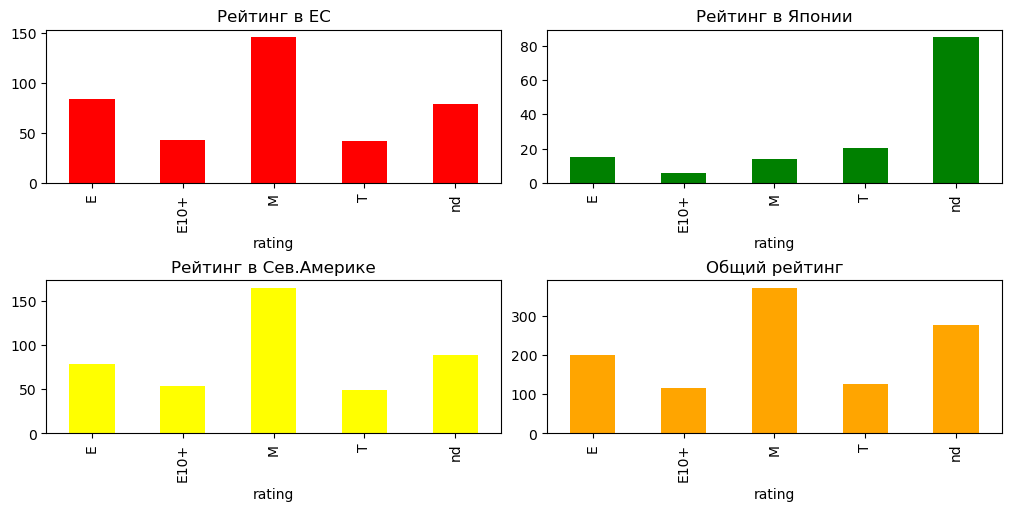

In [75]:
fg = plt.figure(figsize=(10, 5), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])
df_esrb_pivot['eu_sales'].plot(y='eu_sales', x='rating', kind='bar', color='red').set(title='Рейтинг в ЕС')
fig_ax_2 = fg.add_subplot(gs[0, 1])
df_esrb_pivot['jp_sales'].plot(y='jp_sales', x='rating', kind='bar', color='green').set(title='Рейтинг в Японии')
fig_ax_3 = fg.add_subplot(gs[1, 0])
df_esrb_pivot['na_sales'].plot(y='na_sales', x='rating', kind='bar', color='yellow').set(title='Рейтинг в Сев.Америке')
fig_ax_4 = fg.add_subplot(gs[1, 1])
df_esrb_pivot['sum_sales'].plot(y='sum_sales', x='rating', kind='bar', color='orange').set(title='Общий рейтинг');

Судя по графикам влияение рейтинга ESRB есть на все регионы, кроме Японии. В Японии продажи игр без рейтинга лидируют. Это связано с тем, что в Японии дейстует собственный возрастной рейтинг [CERO](https://www.cero.gr.jp/en/publics/index/). При издании игры на консоли в Японии производитель обязан получить рейтинг в этом официальном японском агенстве. Предположительно, все японские пользователи играют в игры с этим рейтингом.

**Общий вывод**
Пользователи Северной Америки и Европы предпочитают игры жанроы `Action`, `Shooter` и `Sport`, играют в них на приставках, популярные платформы: PS4 на первом месте в обоих регионах, PS3 и XOne делят второе и третье в Европе, а в Северной Америке на втором и третьем месте по популярности XOne и X360 - соответственно. В Японии игроки предпочитают жанры `Role-plaing`, `Action` и `Fighting`, популярные игровые платформы: 3DS, PS3, PS4.  
Рейтинг ESRB влияет на продажи в Северной Америке и Европе, в Японии лидируют игры без рейтинга.

<a id='stat'></a>
## Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Нулевая гипотеза: средний пользовательский рейтинг платформы `XOne` равен среднему пользовательскому рейтингу платформы `PC` в актуальном периоде. Альтернативная гипотеза: эти средние значения не равны. Если данные не подтвердят нулевую гипотезу с заданным уровнем значимости (примем его за 5%), то будет автоматически принята альтернативная гипотеза. Иначе, гипотеза не будет опровергнута.

In [76]:
# Отбираем в таблицу из исходной строки с годами из актуального периодаи с ненулевыми пользоавтельскими оцеками
df_stat = df.loc[(df['year_of_release'].isin(last_years)) & (df['user_score']!=0)]
# оценки платформы XOne
sample_xone = list(df_stat[df_stat['platform'] == 'XOne']['user_score'])
# оценки PC
sample_pc = list(df_stat[df_stat['platform'] == 'PC']['user_score'])
# уровень значимости
alpha=0.05
# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(sample_xone, sample_pc, equal_var=True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, рейтинги платформ XOne и PC разные")
else:
    print("Не получилось опровергнуть нулевую гипотезу, рейтинги платформ XOne и PC одинаковые")

p-значение:  0.16390354211387628
Не получилось опровергнуть нулевую гипотезу, рейтинги платформ XOne и PC одинаковые


### Средние пользовательские рейтинги жанров Action и Sports разные
Нулевая гипотеза: средний пользовательский рейтинг жанра `Action` равен среднему пользовательскому рейтингу жанра `Sports` в актуальном периоде. Альтернативная гипотеза: эти средние значения не равны. Если данные не подтвердят нулевую гипотезу с заданным уровнем значимости (примем его за 5%), то будет автоматически принята альтернативная гипотеза. Иначе, гипотеза не будет опровергнута.

In [77]:
# оценки жанра Action
sample_action = list(df_stat[df_stat['genre'] == 'Action']['user_score'])
# оценки Sports
sample_sports = list(df_stat[df_stat['genre'] == 'Sports']['user_score'])
# уровень значимости
alpha=0.05
# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
results = st.ttest_ind(sample_action, sample_sports, equal_var=True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, рейтинги жанров Action и Sports разные")
else:
    print("Не получилось опровергнуть нулевую гипотезу, рейтинги жанров Action и Sports одинаковые")

p-значение:  7.68963684307543e-28
Отвергаем нулевую гипотезу, рейтинги жанров Action и Sports разные


<a id='conclusion'></a>
## Итоговый вывод
1. Выполнен первичный анализ и подготовка данных.  
- исправлен тип данных в столбцах `Year_of_Release`, `Critic_Score`, `User_Score`
- обработаны пропуски в данных в столбцах `Name`, `Genre`, `year_of_release`, `Critic_Score`, `User_Score`. В `Name`, `Genre` 2 пропуска удалены, т.к. они не оказывают существеного значения на исследование, пропуски в `year_of_release` частично заполнены исходя из названия игры, частично - индикаторным значением 0. Пропуски в `Critic_Score` и `User_Score` также заполнены нулями.
- добавлен столбец с суммарными продажами по всем регионам.
2. Исследовательский анализ данных проведен.
- До 2000 года выпускалось значительно меньше игр, чем в 21 веке. Начиная с 2000 года на рынке компьютерных игр наблюдался рост, с 2013 года наметился спад. 
- До нынешних времен дожили не все игровые платформы. Средний срок существования платформы 7 лет, 75 % платформ существуют 11 лет.
- Лидируют по продажам платформы PPS4, PS3, X360, XOne, 3DS, PC. Но для них также действует тренд на снижение продаж.
- Выделяются по выручке жанры с высокими продажами: Shooter, Sports, Action. Жанр Shooter демонстрировал рост продаж в период с 2013 по 2015 год, несмотря на общее падение продаж. Спад продаж произошел в этом жанре только в 2016 году.
- Оценки критиков слабо влияют на продажи, между оценками пользователей и проаджами линейной связи не выявлено. 
3. Портреты пользователей по регионам
- Игроки в Северной Америке предпочитают игры жанров Action, Shooter и Sport, играют в них на приставках, популярные платформы: PS4 на первом месте, далее - XOne и X360.
- В Европе пользователи также предпочитают платформу PS4, PS3 и XOne делят второе и третье место. Предпочтения по жанрам совпадают с Северной Америкой. 
- В Японии игроки предпочитают жанры Role-plaing, Action и Fighting, популярные игровые платформы: 3DS, PS3, PS4.
- Рейтинг ESRB влияет на продажи в Северной Америке и Европе, в Японии лидируют влияения рейтинга ESRB нет, потому что в этом регионе есть собственное рейтинговое агенство CERO, предположительно все японские пользователи пользуются играми с этим рейтингом. 
4. Проверены рабочие гипотезы.
- Предположение о равенстве пользовательских рейтингов платформ XBox One и PC подтвердилось
- Средние пользовательские рейтинги жанров Action и Sports разные
5. По результатам исследования при разработке рекламных компаний 2017 года предлагаем обратить внимание на перспективные жанры: Action, Shooter и Sport на Европейском рынке, игровые платформы S4, PS3 и XOne, X360. Игровой рейтинг ESRB 'M' для игры в этих регионах может обеспечить повышенную доходность. Для Японии актуальны жанры Role-plaing, Action и Fighting, популярные игровые платформы: 3DS, PS3, PS4.